## Brief About The Project

In [665]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [667]:
kickstarter_data = pd.read_csv('DAI_kickstarterscrape_dataset.csv', encoding = 'latin1')

# View Data

### Import Necessary libraries

#### Read csv File

In [672]:
# from google.colab import files
# uploaded = files.upload()

In [673]:
kickstarter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [674]:
kickstarter_data.shape

(45957, 17)

In [677]:
kickstarter_data.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


# Data Cleaning

In [680]:
#Drop unnecessary columns
kickstarter_data = kickstarter_data.drop(['url','comments',"name","funded date","reward levels"], axis=1)

In [681]:
#Check duplicates
kickstarter_data = kickstarter_data.drop_duplicates()

In [682]:
#Drop nulls
kickstarter_data = kickstarter_data.dropna()

In [683]:
kickstarter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44535 entries, 0 to 45956
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         44535 non-null  int64  
 1   category           44535 non-null  object 
 2   subcategory        44535 non-null  object 
 3   location           44535 non-null  object 
 4   status             44535 non-null  object 
 5   goal               44535 non-null  float64
 6   pledged            44535 non-null  float64
 7   funded percentage  44535 non-null  float64
 8   backers            44535 non-null  int64  
 9   levels             44535 non-null  int64  
 10  updates            44535 non-null  int64  
 11  duration           44535 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 4.4+ MB


In [684]:
kickstarter_data['state_abbr'] = kickstarter_data['location'].str.split(',').str[1].str.strip()

In [686]:
def categorize_percentage(Funding_ratio):
    # Convert to percentage
    value = Funding_ratio * 100

    # Categorize based on the given bins
    if value >= 100:
        return 'Completed'
    elif value >= 80:
        return '+80%'
    elif value >= 50:
        return '+50%'
    elif value >= 20:
        return '-50%'
    else:
        return 'Less than 20%'


In [691]:
kickstarter_data['pledge_achieved'] = kickstarter_data['funded percentage'].apply(lambda x: categorize_percentage(x))


In [692]:
kickstarter_data.head()

,project id,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,duration,state_abbr,pledge_achieved
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,10,30.00,MO,Completed
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,6,47.18,NJ,Less than 20%
2,138119,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,1,28.00,CA,Less than 20%
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,4,32.22,CA,Completed
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,30.00,MI,Less than 20%


In [693]:
kickstarter_data.to_csv("kicksthingy.csv", index=False, encoding="utf-8", sep=",")


# Data Analysing

### Mean pledge that projects get

In [696]:
mean_pledge_per_category = kickstarter_data.groupby('category')['pledged'].mean().round(2)

In [697]:
mean_pledge_per_category

category
Art                  2751.23
Comics               5200.22
Dance                2651.27
Design              20351.26
Fashion              2559.40
Film & Video         5160.88
Film &amp; Video     4792.20
Food                 5248.95
Games               15669.28
Music                3680.09
Photography          2633.47
Publishing           2405.90
Technology          14234.84
Theater              3035.92
Name: pledged, dtype: float64

### Histogram shows the distribution for the number of backers.

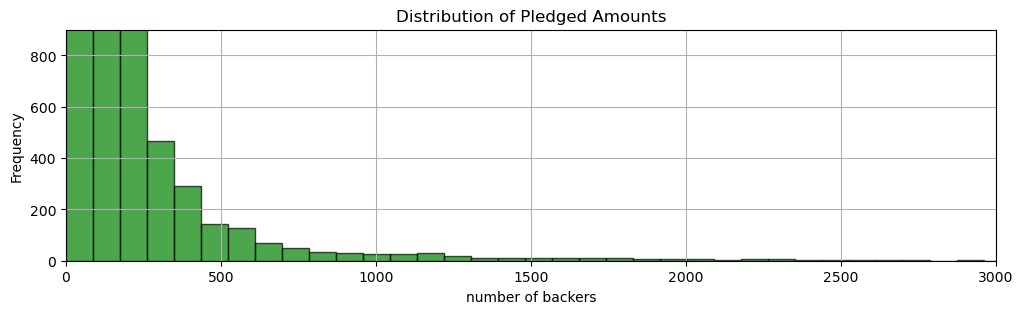

In [701]:
plt.figure(figsize=(12, 3))  # Figure size
kickstarter_data['backers'].hist(bins=1000,
                           color='green',
                           edgecolor='black',
                           alpha=0.7)
# axis range
plt.xlim(0,3000)
plt.ylim(0,900)
plt.xlabel('number of backers')
plt.ylabel('Frequency')
plt.title('Distribution of Pledged Amounts')
plt.show()

### The success rate of projects

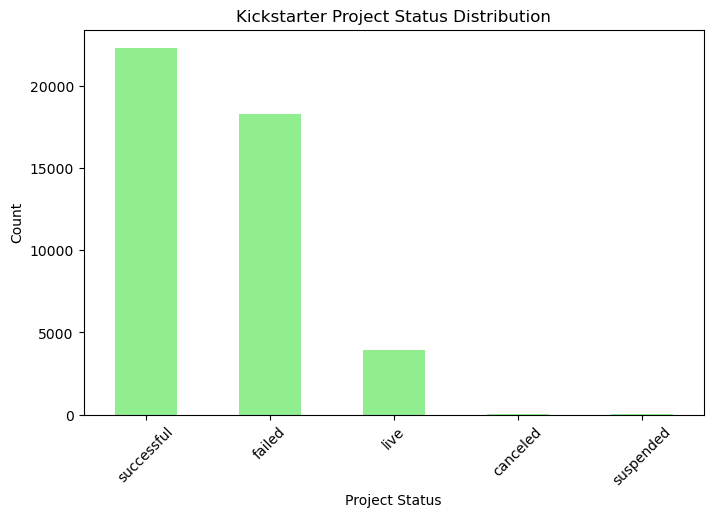

In [703]:
status_counts = kickstarter_data["status"].value_counts()
# Plot of status distribution
plt.figure(figsize=(8, 5))
status_counts.plot(kind="bar",color='lightgreen')
plt.xlabel("Project Status")
plt.ylabel("Count")
plt.title("Kickstarter Project Status Distribution")
plt.xticks(rotation=45)
plt.show()

### Project Category and status

<Figure size 1200x800 with 0 Axes>

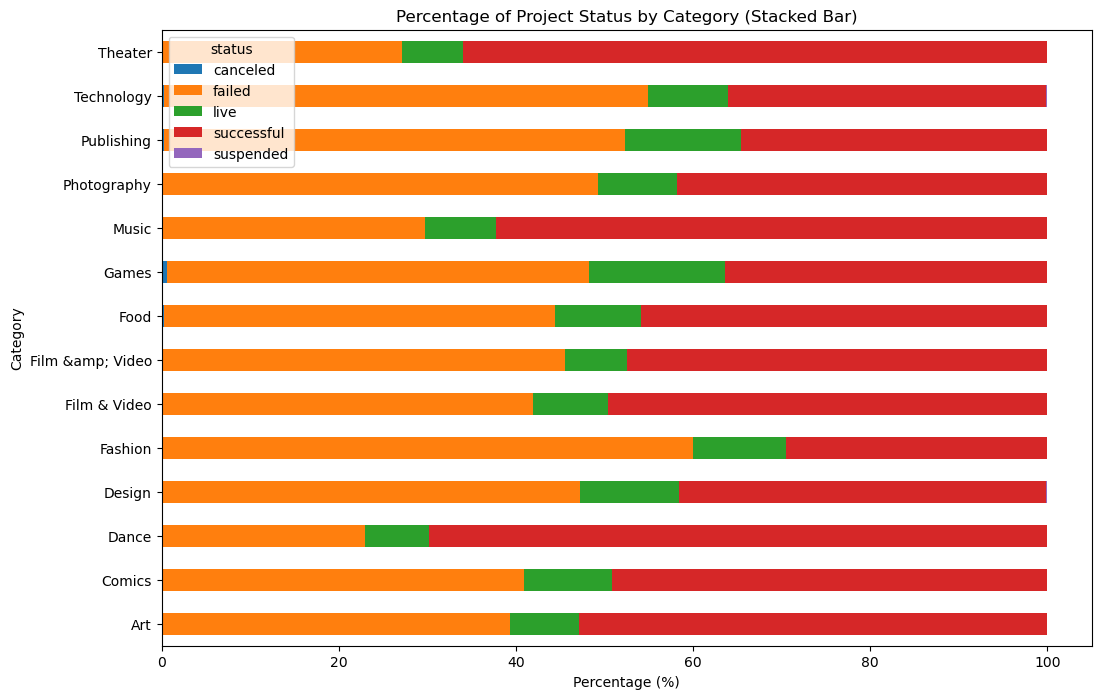

In [710]:
# Group by 'category' and 'status', calculate the percentage for each status for each category
category_status_percentage = kickstarter_data.groupby(['category', 'status']).size() / kickstarter_data.groupby('category').size() * 100
category_status_percentage = category_status_percentage.reset_index(name='percentage')
category_status_pivot = category_status_percentage.pivot(index='category', columns='status', values='percentage').fillna(0)

plt.figure(figsize=(12, 8))
category_status_pivot.plot(kind='barh', stacked=True, figsize=(12, 8))
custom_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  
plt.xlabel('Percentage (%)')
plt.ylabel('Category')
plt.title('Percentage of Project Status by Category (Stacked Bar)')

plt.show()

### The success rate  across US states

In [712]:
#Function that show wether the [location] is states in us or not
def yes_no(lst):
    if lst in us_states:
        res = "Yes"
    else:
        res =  "No"
    return res

In [713]:
us_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME",
             "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA",
             "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
kickstarter_data["in_usa"] = kickstarter_data["state_abbr"].apply(yes_no)

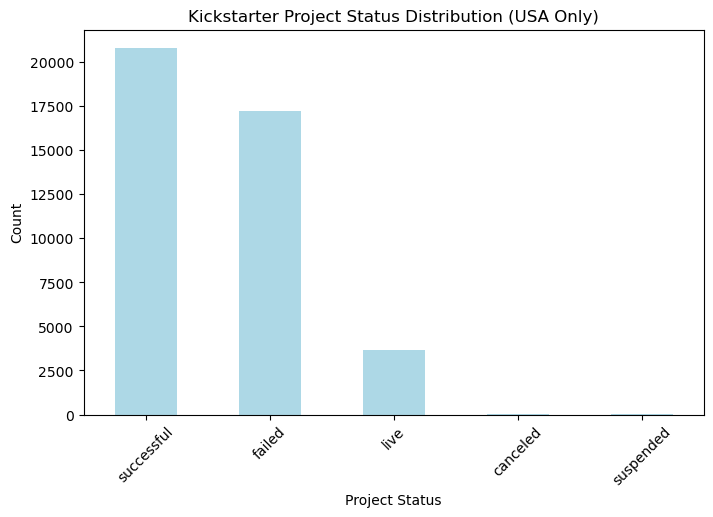

In [716]:
df_usa = kickstarter_data[kickstarter_data["in_usa"] == "Yes"]

# Group by status and count
status_counts = df_usa["status"].value_counts()
plt.figure(figsize=(8, 5))
status_counts.plot(kind="bar",
                   color="lightblue")
plt.xlabel("Project Status")
plt.ylabel("Count")
plt.title("Kickstarter Project Status Distribution (USA Only)")
plt.xticks(rotation=45)
plt.show()

### The differences between projects that succeed and ones that fail

In [721]:
# # Group by 'status' and calculate the mean number of backers
# mean_backers = kickstarter_data.groupby('status')['backers'].mean().reset_index()
# mean_pledged = kickstarter_data.groupby('status')['pledged'].mean().reset_index()
# fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# # Plot (1) is Distribution of backers for successful vs failed projects
# sns.barplot(data=mean_pledged, x='status', y='pledged', errorbar=None, ax=axes[0],color="red")
# axes[0].set_xlabel('Project Status')
# axes[0].set_ylabel('Mean Number of bledges')
# axes[0].set_title('mean Number of pledged for Successful vs Failed Projects')

# # Plot (2) is Mean number of backers for successful vs failed projects
# sns.barplot(data=mean_backers, x='status', y='backers', ax=axes[1],color="orange")
# axes[1].set_xlabel('Project Status')
# axes[1].set_ylabel('Mean Number of Backers')
# axes[1].set_title('Mean Number of Backers for Successful vs Failed Projects')

# # Show the plot
# plt.tight_layout()  # Adjust layout for better spacing
# plt.show()

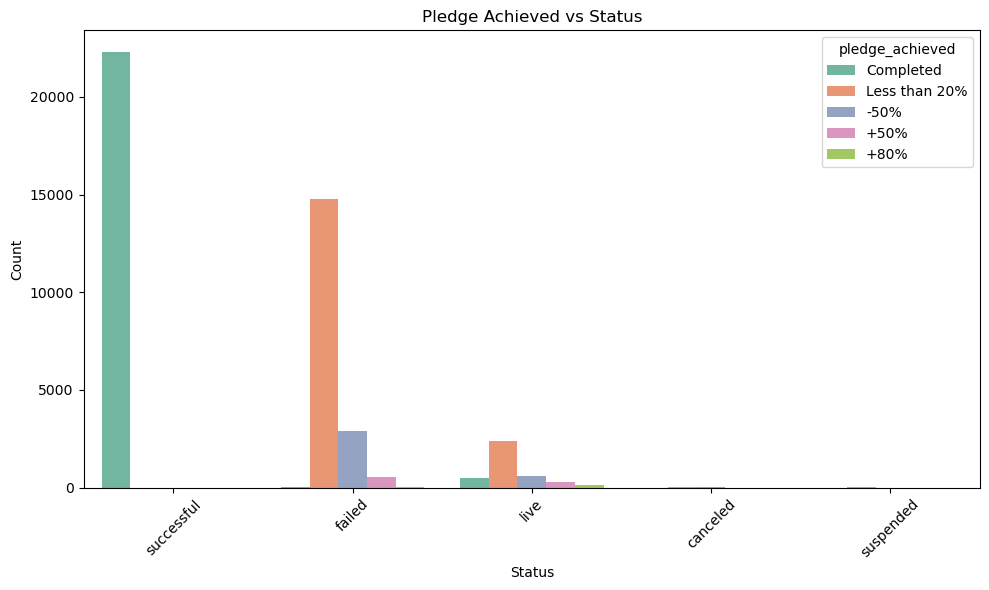

In [724]:
plt.figure(figsize=(10, 6))
sns.countplot(data=kickstarter_data, x='status', hue='pledge_achieved', palette='Set2')
plt.title('Pledge Achieved vs Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [725]:
mean_pledged

,status,pledged
0,canceled,2019.779661
1,failed,909.268707
2,live,3491.343238
3,successful,8726.587470
4,suspended,14757.250000


In [727]:
mean_backers

,status,backers
0,canceled,39.966102
1,failed,12.708249
2,live,52.819672
3,successful,120.970985
4,suspended,192.000000


In [730]:
# print(kickstarter_data.columns)
kickstarter_data.to_csv("forpowerbi1.csv", index=False, encoding="utf-8", sep=",")

In [731]:
kickstarter_data = kickstarter_data.drop(columns=["in_usa"])

# Applying Machine Learning

In [735]:
kickstarter_data.head()

,project id,category,subcategory,location,status,goal,pledged,funded percentage,backers,levels,updates,duration,state_abbr,pledge_achieved
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,7,10,30.00,MO,Completed
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,5,6,47.18,NJ,Less than 20%
2,138119,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,10,1,28.00,CA,Less than 20%
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,13,4,32.22,CA,Completed
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,6,2,30.00,MI,Less than 20%


Mean Squared Error: 362124542.1910861
R2 Score: 0.8020374624473026
Feature Importance:
 pledged              6.579621e-01
backers              3.212768e-01
project id           5.528745e-03
goal                 5.155288e-03
funded percentage    3.346103e-03
subcategory          1.615217e-03
updates              1.432260e-03
location             1.144059e-03
state_abbr           9.688631e-04
levels               6.538087e-04
duration             5.256157e-04
category             3.910354e-04
pledge_achieved      9.884651e-08
dtype: float64


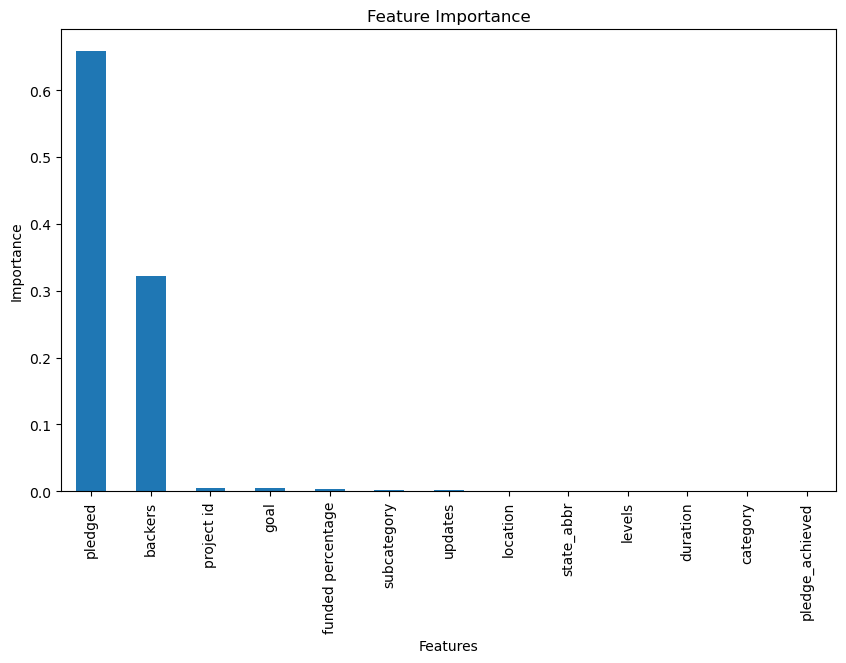

In [737]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical columns
ml_kickstarter_data = kickstarter_data.copy()  # Create a copy of the dataset
label_encoders = {}
categorical_columns = ["category", "subcategory", "location", "state_abbr", "status", "pledge_achieved"]

for col in categorical_columns:
    le = LabelEncoder()
    ml_kickstarter_data[col] = le.fit_transform(ml_kickstarter_data[col])
    label_encoders[col] = le

# Define features and target variable
X = ml_kickstarter_data.drop(columns=["status"])  # Features
y = ml_kickstarter_data["pledged"]  # Assuming 'pledged' is a continuous target variable (you can adjust this to your actual continuous target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)

# Evaluate model using regression metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Optionally, plot feature importance
import matplotlib.pyplot as plt
feature_importance.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [504]:
# Encode categorical columns
ml_kickstarter_data=kickstarter_data
label_encoders = {}
categorical_columns = ["category", "subcategory", "location","state_abbr", "status","pledgd_achieved"]
for col in categorical_columns:
    le = LabelEncoder()
    ml_kickstarter_data[col] = le.fit_transform(ml_kickstarter_data[col])
    label_encoders[col] = le

# Define features and target variable
X = ml_kickstarter_data.drop(columns=["status",""])
y = ml_kickstarter_data["status"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


Accuracy: 0.9154597507578309
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.99      0.92      3622
           2       0.71      0.08      0.14       774
           3       0.98      1.00      0.99      4498

    accuracy                           0.92      8907
   macro avg       0.63      0.52      0.51      8907
weighted avg       0.90      0.92      0.88      8907

Feature Importance:
 funded percentage    0.423843
pledged              0.150988
backers              0.143948
goal                 0.066876
updates              0.051088
project id           0.032102
duration             0.027740
location             0.027500
state_abbr           0.021207
levels               0.021163
subcategory          0.019983
category             0.013560
dtype: float64


C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [743]:
X_test.head(1)

,project id,category,subcategory,location,goal,pledged,funded percentage,backers,levels,updates,duration,state_abbr,pledge_achieved
24734,1161580571,9,6,4124,300.0,386.0,1.286667,13,6,4,19.79,101,3


In [661]:
X_train

,project id,category,subcategory,location,goal,pledged,funded percentage,backers,levels,updates,duration,state_abbr
39946,1874144052,3,40,3263,3000.0,3750.0,1.250000,40,6,2,21.00,63
14996,711788183,0,1,3188,9750.0,1075.0,0.110256,22,4,0,40.95,195
15071,714774380,6,45,2458,1600.0,1600.0,1.000000,11,6,0,59.96,23
26364,1242123696,3,40,3311,15000.0,15222.0,1.014800,92,7,9,60.00,23
43223,2026819049,6,19,1114,3000.0,1357.0,0.452333,20,10,0,31.00,24
...,...,...,...,...,...,...,...,...,...,...,...,...
6450,303679098,11,5,4486,15000.0,20.0,0.001333,1,2,0,34.27,50
11603,549450880,0,1,1478,1000.0,1011.0,1.011000,30,20,3,31.13,50
39293,1842881700,9,43,171,2000.0,2017.0,1.008500,23,13,3,35.20,54
890,41183865,5,15,1247,3000.0,3306.0,1.102000,75,9,6,60.00,137


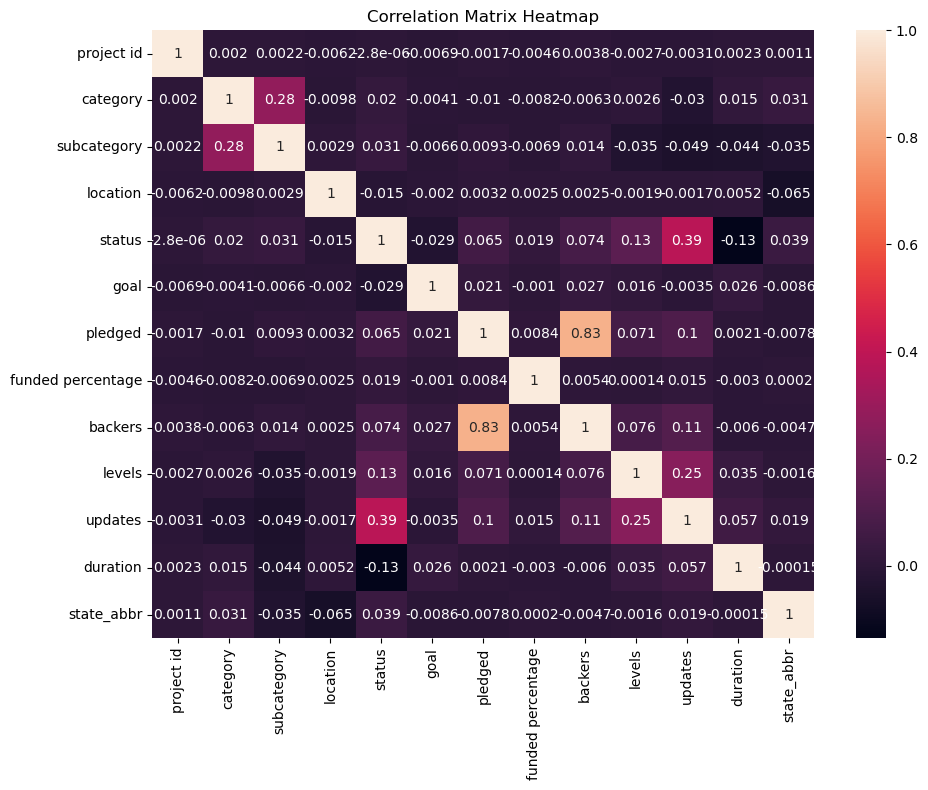

In [747]:
corr_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)#, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()